In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import ZeroPadding2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
h=w=224
input_shape = (h, w, 1 )
batch_size =32

#reg1 = 0.001
#reg2 = 0.012




In [ ]:
model = Sequential()
#Convolutional layers
conv1 = Conv2D(96, kernel_size=(3, 3), strides=(1, 11), padding='same',activation='relu', input_shape=input_shape)
model.add(conv1)
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))


conv2 = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape)
model.add(conv2)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))


Dropout(rate=0.2)

#Step 3 - Flattening
model.add(Flatten())

#Step 4 - Full connection
model.add(Dense(units = 256, activation = 'relu'))
#Use of regularization
#model.add(Dense(units = 500, kernel_regularizer=regularizers.l2(reg1), activation = 'relu'))
model.add(Dense(units = 196, activation = 'relu'))

# Binary classification
model.add(Dense(units = 1, activation = 'sigmoid'))

#multi class classification
#model.add(Dense(units = 6, activation = 'softmax'))

#Optimizers
#opt = optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.03)
#opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#opt = optimizers.SGD(lr=0.001, decay=0.0, nesterov=True)
#opt = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
opt = 'adam'

#Compiling the CNN
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

#rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_delta=1E-7, verbose=1, callbacks=[rlrp])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 224, 21, 96)       960       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 223, 20, 96)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 223, 20, 256)      221440    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 222, 19, 256)     0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1079808)           0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/gdrive/MyDrive/resizedGray/combine012',
                                                 target_size = (h, w),
                                                 batch_size = 32,
                                                 #shuffle = True,
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory('/gdrive/MyDrive/resizedGray/fold3',
                                            target_size = (h, w ),
                                            batch_size = 32,
                                            #shuffle = True,
                                            class_mode = 'binary')

Found 1318 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(training_set, steps_per_epoch=1318//batch_size, epochs = 5, validation_steps=430//batch_size, validation_data = test_set, verbose =1)

<ipython-input-28-af2d6e9e7a6a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set, steps_per_epoch=1318//batch_size, epochs = 5, validation_steps=430//batch_size, validation_data = test_set, verbose =1)


Epoch 1/5
41/41 [==============================] - 19s 463ms/step - loss: 0.6016 - accuracy: 0.7007 - val_loss: 0.5695 - val_accuracy: 0.7163
Epoch 2/5
41/41 [==============================] - 21s 518ms/step - loss: 0.5695 - accuracy: 0.7091 - val_loss: 0.6047 - val_accuracy: 0.6971
Epoch 3/5
41/41 [==============================] - 19s 457ms/step - loss: 0.5590 - accuracy: 0.7147 - val_loss: 0.5420 - val_accuracy: 0.7163
Epoch 4/5
41/41 [==============================] - 23s 554ms/step - loss: 0.5350 - accuracy: 0.7327 - val_loss: 0.5876 - val_accuracy: 0.6899
Epoch 5/5
41/41 [==============================] - 21s 513ms/step - loss: 0.5203 - accuracy: 0.7345 - val_loss: 0.5600 - val_accuracy: 0.7043


KeyError: ignored

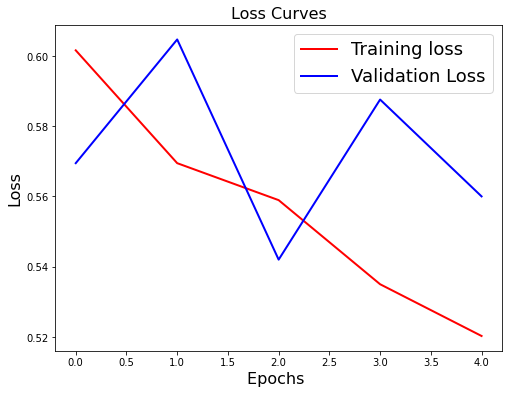

<Figure size 576x432 with 0 Axes>

In [ ]:

#Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=2.0)
plt.plot(history.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#Confution Matrix and Classification Report
validation_generator = test_set
num_of_test_samples = 430
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = K.round(Y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['A', 'N']
print(classification_report(validation_generator.classes, Y_pred, target_names=target_names))


In [ ]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('my_model.h5')